In [1]:
#Basic Libararies
import numpy as np
import pandas as pd

#Visualization libararies
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Libararies
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep Learning Libararies
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
#Digit Mnist dataset
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [3]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

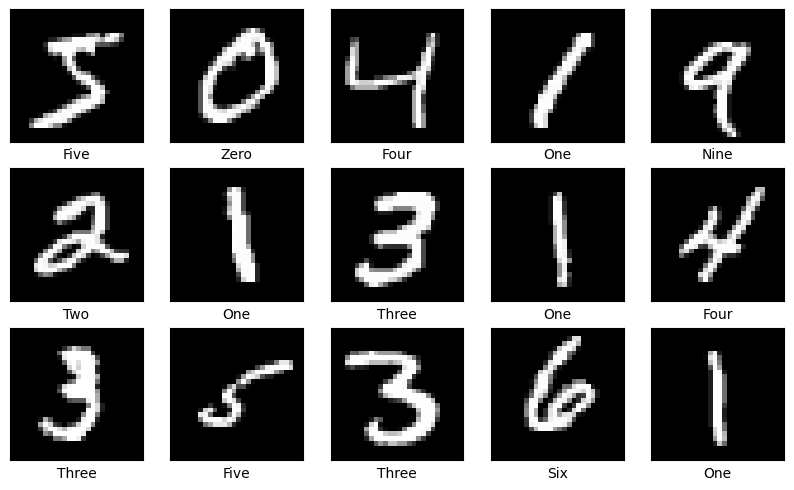

In [5]:
#Name of Numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualization the digit
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()
    

In [6]:
x_train_digit.shape

(60000, 28, 28)

In [7]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [8]:
x_train_digit.shape

(60000, 784)

In [9]:
y_train_digit.shape

(60000,)

In [10]:
#Encoding Digit Mnist Lables
y_train_digit = to_categorical(y_train_digit, num_classes=10)


In [11]:
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [12]:
y_test_digit[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
y_test_digit.shape

(10000, 10)

In [19]:
#Create base neural network

model= keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid')
])
    

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Compiling the model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(x_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 9s 12ms/step - loss: 1.2089 - accuracy: 0.8544 - val_loss: 0.3396 - val_accuracy: 0.9104
Epoch 2/10
600/600 [==============================] - 6s 11ms/step - loss: 0.2390 - accuracy: 0.9353 - val_loss: 0.2138 - val_accuracy: 0.9402
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1748 - accuracy: 0.9517 - val_loss: 0.2155 - val_accuracy: 0.9453
Epoch 4/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1400 - accuracy: 0.9610 - val_loss: 0.1941 - val_accuracy: 0.9498
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1182 - accuracy: 0.9658 - val_loss: 0.1932 - val_accuracy: 0.9538
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1167 - accuracy: 0.9674 - val_loss: 0.1831 - val_accuracy: 0.9552
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0927 - accuracy: 0.9737 - val_loss: 0.1630 - val_accuracy: 0.9588

In [23]:
#Predict the Labels-Digits
y_predict=model.predict(x_test_digit)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_predict[1]

array([1.0282028e-16, 9.9999744e-01, 1.0000000e+00, 2.2552774e-06,
       9.5282452e-08, 2.0116990e-09, 2.5945236e-16, 8.0832324e-05,
       2.6332263e-12, 2.8884433e-05], dtype=float32)

In [26]:
y_predict=np.argmax(y_predict, axis=1) #Here we get index of maximum value in the Encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [27]:
y_predict[1]

2

C:\Users\mdfai\AppData\Local\Temp\ipykernel_16136\301777819.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


<function matplotlib.pyplot.show(close=None, block=None)>

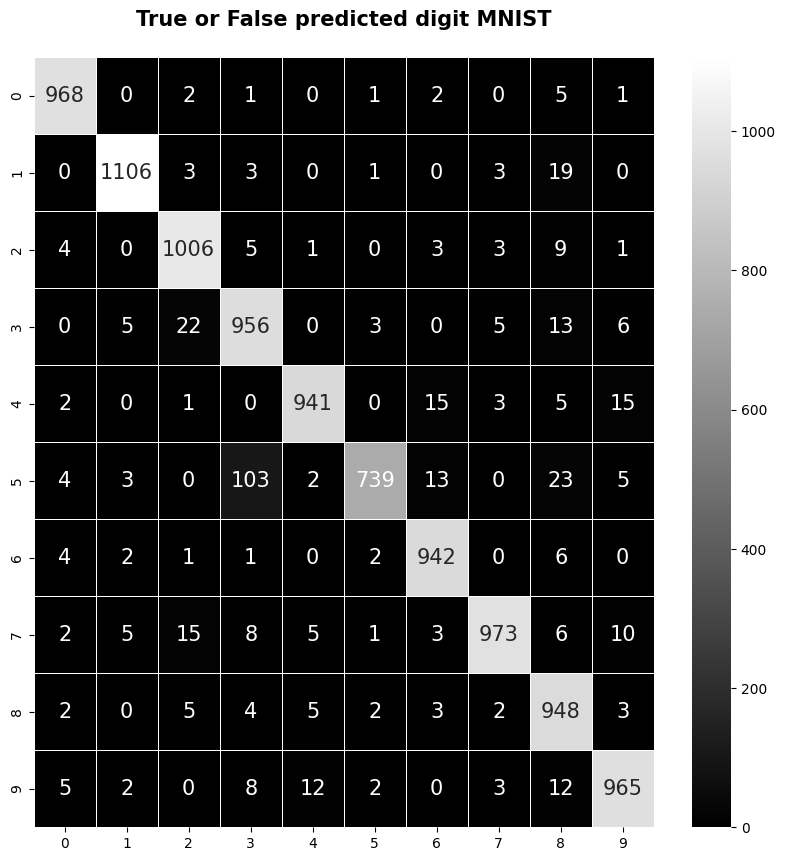

In [29]:
#Confusion Matrix for Digit MNIST

cm=confusion_matrix(y_test_digit_eval,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={'size':15}, linewidth=0.5, fmt='d', cmap='gray')
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.97      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.88      0.95      0.91      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.83      0.90       892
           6       0.96      0.98      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.91      0.97      0.94       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000



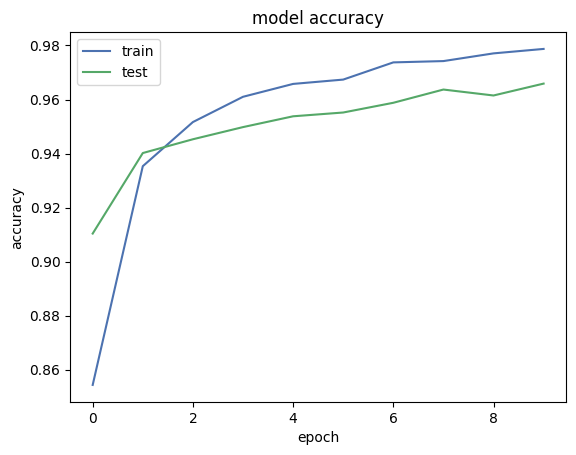

In [31]:
#Summary history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='best')
plt.show()

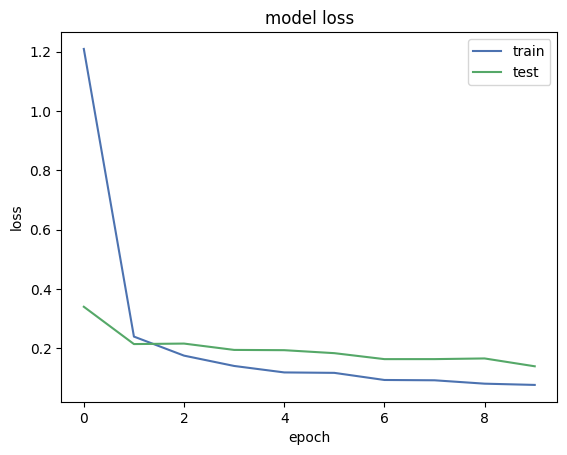

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='best')
plt.show()

In [34]:
#ft. expand_dmis(x_test_digit[0])
y_predict_single=model.predict(x_test_digit[[3]])
y_predict_single=np.argmax(y_predict_single, axis=1) #Here we get index of maximum value in the Encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 46ms/step


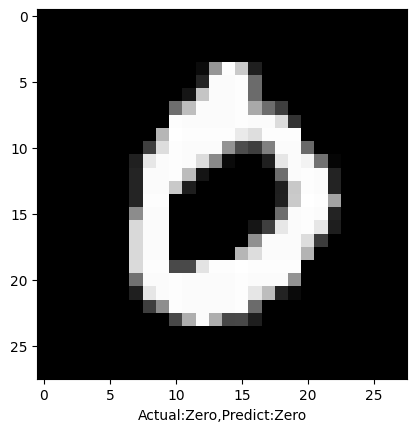

In [38]:
#Name of Numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualization the digit
plt.imshow(x_test_digit[3].reshape(28,28), cmap='gray')
plt.xlabel('Actual:{},Predict:{}'.format(col_names[y_test_digit_eval[3]],col_names[y_predict_single[0]]))
plt.show()
           
                                         